**Simple Linear Regression: House Price Prediction Project**

**Project Description**

This project uses **Simple Linear Regression** to predict house prices based on the **square footage of living area (`sqft_living`)** using a real dataset.

We'll go through:

- Data loading and exploration
- Feature selection
- Visualizing the relationship
- Training a Linear Regression model
- Evaluating model performance
- Making predictions on unseen data

**Objective**

Build a regression model to understand the relationship between square footage and price, and use it to predict prices for new, unseen homes.



# Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the Dataset

We are loading the dataset from the given path using pandas.read_csv() and displaying the first few rows using df.head().

In [ ]:
df = pd.read_csv(r"C:\Users\shali\Desktop\DS_Road_Map\8. Machine Learning\Regression\SLR_House_Price_Prediction\House_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Understand the Data
info() gives an overview of column types and non-null counts.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

describe() gives statistical summary of numerical features.

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.index

RangeIndex(start=0, stop=21613, step=1)

In [7]:
df.shape

(21613, 21)

In [8]:
df.isnull

<bound method DataFrame.isnull of                id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7 

In [9]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Select Features for Simple Linear Regression
We're using only one feature sqft_living to predict the house price, hence it's a Simple Linear Regression.

In [5]:
X = np.array(df['sqft_living']).reshape(-1, 1)  # Independent variable
y = np.array(df['price'])                       # Dependent variable

- sklearn models expect X to be a 2D array → shape (n_samples, n_features)

- .reshape(-1, 1) converts a 1D array to 2D

- -1 lets NumPy figure out the number of rows

- 1 means one feature (column)

 - y can stay 1D — it only contains target values.

# Visualize the Relationship
A scatter plot helps to visualize whether there’s a linear relationship between sqft_living and price.

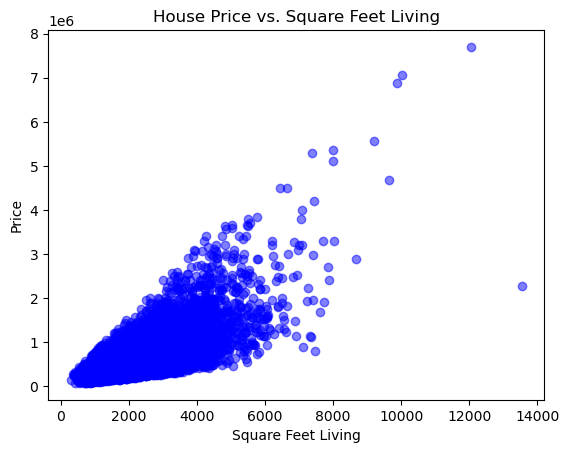

In [ ]:
plt.scatter(X, y, color='blue', alpha=0.5)
plt.title("House Price vs. Square Feet Living")
plt.xlabel("Square Feet Living")
plt.ylabel("Price")
plt.show()

# Split the Data
We split the data into training and testing sets (80-20 split) so that we can evaluate the model's performance on unseen data.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and Train the Model
We create a Linear Regression model and fit it using the training data.

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Get Model Parameters
* **Intercept (𝑏₀)**: The constant term — it's the value of the price when `sqft_living = 0`.
* **Coefficient (𝑏₁)**: The slope — it tells how much the price increases for each additional square foot.

 **Equation of the model**:

$$
\text{Predicted Price} = b₀ + b₁ \times \text{sqft\_living}
$$



In [9]:
print("Intercept (b₀):", model.intercept_)
print("Coefficient (b₁):", model.coef_[0])

Intercept (b₀): -42291.12839802564
Coefficient (b₁): 279.7397784623452


# Predict and Evaluate the Model

- MSE measures average squared difference between actual and predicted values.

- R² Score tells how well the model explains the variation in the target variable.



In [10]:
y_pred = model.predict(X_test)
print(y_pred)

[ 536770.21301903  768954.22914278 1012327.83640502 ...  638595.49237932
  587123.37314225  676640.1022502 ]


## Metrics

In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [12]:
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 76570251342.04109
R² Score: 0.4941006145983624


# Plot the Regression Line

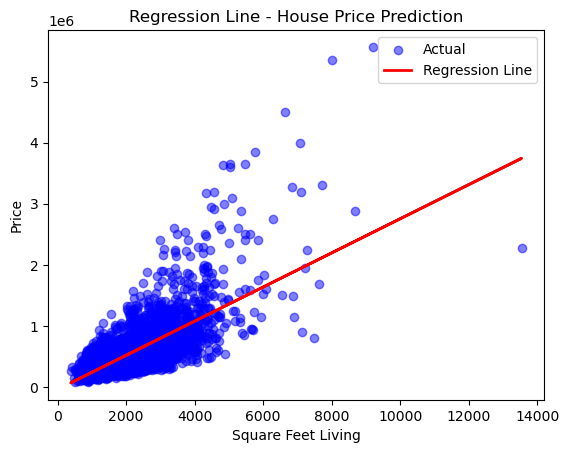

In [13]:
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label="Actual")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression Line")
plt.title("Regression Line - House Price Prediction")
plt.xlabel("Square Feet Living")
plt.ylabel("Price")
plt.legend()
plt.show()

# Predict on New (Unseen) Data
We use the trained model to predict house prices for unseen data points.

In [14]:
# Example: Predict price for 2000, 2500, and 3000 square feet
new_sqft = np.array([[2000], [2500], [3000]])
predicted_price = model.predict(new_sqft)

for sqft, price in zip(new_sqft, predicted_price):
    print(f"Predicted price for {sqft[0]} sqft = ${price:,.2f}")

Predicted price for 2000 sqft = $517,188.43
Predicted price for 2500 sqft = $657,058.32
Predicted price for 3000 sqft = $796,928.21


# Conclusion

- We built a Simple Linear Regression model using sqft_living to predict house prices.

- Evaluated it using metrics like MSE and R².

- Plotted the regression line and predicted new values.

